In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_excel('sales.xlsx')
sales

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


In [4]:
sales.set_index ('CustomerID', inplace = True)

In [5]:
#check for duplicates 
#sales [sales.duplicated()]
sales.drop_duplicates(inplace= True)

In [6]:
sales.shape

(7000, 14)

INFO : 6 float variables;
8 integer variables;
1 object variable

In [7]:
#Impute MntDrinks

sales_products = sales[['MntDrinks','MntDesserts','MntEntries','MntVegan&Vegetarian']] # we are using this variables to impute in drinks because they have a corr>0.7

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(sales_products) # this is an array
sales_products = pd.DataFrame(array_impute, columns = sales_products.columns)

sales['MntDrinks'] = sales_products['MntDrinks'].values

In [8]:
#Input recency com a média
sales.fillna({'Recency': sales['Recency'].mean}, inplace = True)

In [9]:
#sales.isna().sum()

In [10]:
sales

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0


In [11]:
df_mnt=sales[['MntMeat&Fish','MntEntries','MntVegan&Vegetarian','MntDrinks','MntDesserts','MntAdditionalRequests']].copy()

In [12]:
df_mnt

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
CustomerID,,,,,,
11054,7230.0,1820,3435.0,1600.0,440.0,57.0
17117,5850.0,320,2745.0,500.0,320.0,8.0
31751,8380.0,0,1560.0,0.0,0.0,28.0
12947,5090.0,280,2355.0,140.0,560.0,78.0
11402,330.0,0,240.0,0.0,0.0,7.0
...,...,...,...,...,...,...
23699,290.0,20,180.0,0.0,40.0,4.0
23255,230.0,80,525.0,20.0,80.0,23.0
5798,3050.0,2460,3840.0,1800.0,980.0,107.0


In [13]:
from sklearn.cluster import KMeans

In [14]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt)
    inertias.append(model.inertia_)

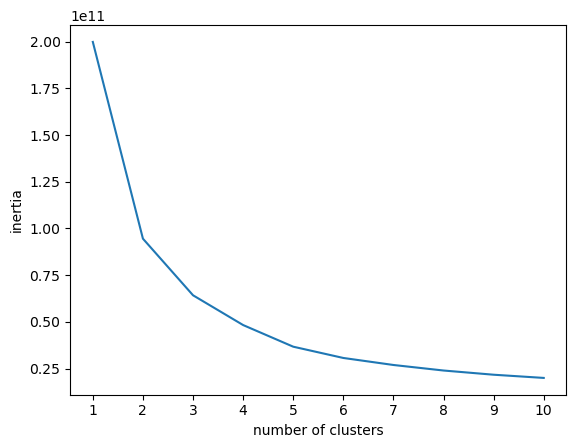

In [15]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [16]:
df_mnt.corr()

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
MntMeat&Fish,1.000000,0.391166,0.475275,0.389256,0.405025,0.383335
MntEntries,0.391166,1.000000,0.458884,0.558761,0.566151,0.371052
MntVegan&Vegetarian,0.475275,0.458884,1.000000,0.459858,0.457396,0.289569
MntDrinks,0.389256,0.558761,0.459858,1.000000,0.550678,0.380607
MntDesserts,0.405025,0.566151,0.457396,0.550678,1.000000,0.374886
MntAdditionalRequests,0.383335,0.371052,0.289569,0.380607,0.374886,1.000000


In [17]:
df_mnt_k3 = df_mnt.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(df_mnt)

In [18]:
model_k3

KMeans(n_clusters=3, random_state=100)

In [19]:
# DO IT
df_mnt_k3['k3 cluster'] = model_k3.labels_

In [20]:
#DO IT
df_mnt_k3.groupby(['k3 cluster']).mean().transpose()

k3 cluster,0,1,2
MntMeat&Fish,956.681856,5884.102174,6803.401108
MntEntries,236.035640,1337.709382,861.040443
MntVegan&Vegetarian,736.589215,11161.316362,3632.998892
MntDrinks,240.090349,1351.851259,890.258172
MntDesserts,234.017172,1349.210526,883.209972
MntAdditionalRequests,27.165841,69.141533,66.526316


In [21]:
#DO IT
descr3 = df_mnt_k3.groupby(['k3 cluster']).describe().transpose()
descr3

k3 cluster                             0             1             2
MntMeat&Fish          count  4321.000000    874.000000   1805.000000
                      mean    956.681856   5884.102174   6803.401108
                      std    1108.045828   3325.637477   2701.741201
                      min       0.000000      3.000000   1579.000000
                      25%     120.000000   3512.500000   4770.000000
                      50%     400.000000   5655.000000   6290.000000
                      75%    1620.000000   8052.500000   8510.000000
                      max    4690.000000  14890.000000  14980.000000
MntEntries            count  4321.000000    874.000000   1805.000000
                      mean    236.035640   1337.709382    861.040443
                      std     456.556941   1040.883035    867.220195
                      min       0.000000      0.000000      0.000000
                      25%      20.000000    500.000000    220.000000
                      50%      80.000000   1060.000000    560.000000
                      75%     220.000000   2040.000000   1260.000000
                      max    3940.000000   3980.000000   3980.000000
MntVegan&Vegetarian   count  4321.000000    874.000000   1805.000000
                      mean    736.589215  11161.316362   3632.998892
                      std     919.363299   4290.225710   1892.392682
                      min       0.000000   6660.000000    120.000000
                      25%     150.000000   8482.500000   1980.000000
                      50%     345.000000   9982.500000   3420.000000
                      75%     990.000000  12108.750000   5130.000000
                      max    6780.000000  25974.000000   8265.000000
MntDrinks             count  4321.000000    874.000000   1805.000000
                      mean    240.090349   1351.851259    890.258172
                      std     463.927864   1053.282578    901.479714
                      min       0.000000      0.000000      0.000000
                      25%      20.000000    500.000000    200.000000
                      50%      80.000000   1100.000000    560.000000
                      75%     240.000000   2040.000000   1340.000000
                      max    3960.000000   3980.000000   3980.000000
MntDesserts           count  4321.000000    874.000000   1805.000000
                      mean    234.017172   1349.210526    883.209972
                      std     443.157593   1055.789855    909.809565
                      min       0.000000      0.000000      0.000000
                      25%      20.000000    480.000000    220.000000
                      50%      80.000000   1060.000000    560.000000
                      75%     240.000000   2100.000000   1280.000000
                      max    3900.000000   3980.000000   3980.000000
MntAdditionalRequests count  4321.000000    874.000000   1805.000000
                      mean     27.165841     69.141533     66.526316
                      std      37.306960     59.243045     55.210693
                      min       0.000000      0.000000      0.000000
                      25%       5.000000     25.000000     26.000000
                      50%      13.000000     51.000000     48.000000
                      75%      32.000000    102.000000     94.000000
                      max     249.000000    249.000000    249.000000

In [22]:
df_mnt_k2 = df_mnt.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(df_mnt)

In [23]:
# DO IT
df_mnt_k2['k2'] = model_k2.labels_

In [24]:
#DO IT
df_mnt_k2.groupby(['k2']).mean().transpose()

k2,0,1
MntMeat&Fish,1395.646661,6921.731974
MntEntries,279.485104,1117.202063
MntVegan&Vegetarian,898.439490,7089.850211
MntDrinks,289.985289,1131.976559
MntDesserts,277.559112,1140.980778
MntAdditionalRequests,31.554674,67.659025


In [25]:
#DO IT
descr2 = df_mnt_k2.groupby(['k2']).describe().transpose()
descr2

k2                                     0             1
MntMeat&Fish          count  4867.000000   2133.000000
                      mean   1395.646661   6921.731974
                      std    1660.501958   3123.417474
                      min       0.000000      3.000000
                      25%     140.000000   4710.000000
                      50%     560.000000   6880.000000
                      75%    2225.000000   8990.000000
                      max    8190.000000  14980.000000
MntEntries            count  4867.000000   2133.000000
                      mean    279.485104   1117.202063
                      std     523.213345    961.613668
                      min       0.000000      0.000000
                      25%      20.000000    400.000000
                      50%      80.000000    800.000000
                      75%     280.000000   1660.000000
                      max    3980.000000   3980.000000
MntVegan&Vegetarian   count  4867.000000   2133.000000
                      mean    898.439490   7089.850211
                      std    1045.568704   4582.028513
                      min       0.000000    300.000000
                      25%     165.000000   3945.000000
                      50%     435.000000   6315.000000
                      75%    1290.000000   9240.000000
                      max    6780.000000  25974.000000
MntDrinks             count  4867.000000   2133.000000
                      mean    289.985289   1131.976559
                      std     534.539659    994.454506
                      min       0.000000      0.000000
                      25%      20.000000    360.000000
                      50%      80.000000    840.000000
                      75%     280.000000   1720.000000
                      max    3980.000000   3980.000000
MntDesserts           count  4867.000000   2133.000000
                      mean    277.559112   1140.980778
                      std     503.891460   1007.281470
                      min       0.000000      0.000000
                      25%      20.000000    360.000000
                      50%      80.000000    800.000000
                      75%     280.000000   1780.000000
                      max    3860.000000   3980.000000
MntAdditionalRequests count  4867.000000   2133.000000
                      mean     31.554674     67.659025
                      std      41.583637     56.915912
                      min       0.000000      0.000000
                      25%       6.000000     26.000000
                      50%      15.000000     49.000000
                      75%      39.000000     95.000000
                      max     249.000000    249.000000

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k3.MntMeat&Fish, df_mnt_k3.MntDrinks, c=df_mnt_k3k3 cluster)
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 3 clusters')
plt.show()

SyntaxError: invalid syntax (3698658096.py, line 3)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntEntries'], df_mnt_k2['MntMeat&Fish'], c=df_mnt_k2['k2'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt['MntEntries'], df_mnt['MntMeat&Fish'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntDrinks'], df_mnt_k2['MntEntries'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a list to store silhouette scores for different values of k
silhouette_scores = []

# Fit k-means clustering for different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_mnt)
    score = silhouette_score(df_mnt, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different values of k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()


In [ ]:
df_mnt_k4 = df_mnt.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [ ]:
# DO IT
df_mnt_k4['k4'] = model_k4.labels_

In [ ]:
#DO IT
df_mnt_k4.groupby(['k4']).mean().transpose()

In [ ]:
descr4 = df_mnt_k4.groupby(['k4']).describe().transpose()
descr4

In [ ]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()


In [ ]:
df_mnt.corr()

In [ ]:
#Let's try interpret MntEntries, MntDrinks and MntDesserts as compliments

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply MinMaxScaler to your dataframe
df_mnt_scaled = scaler.fit_transform(df_mnt)

# The df_mnt_scaled is now a numpy array with the same shape as your original dataframe

import pandas as pd

# Transform numpy array into dataframe
df_mnt_scaled = pd.DataFrame(df_mnt_scaled, columns=df_mnt.columns)


In [ ]:
df_mnt_scaled

In [ ]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt_scaled)
    inertias.append(model.inertia_)

In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
df_k4 = df_mnt_scaled.copy()
k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [ ]:
# DO IT
df_k4['k4_c'] = k4.labels_

In [ ]:
#DO IT
df_k4.groupby(['k4_c']).mean().transpose()

In [ ]:
#DO IT
d4 = df_k4.groupby(['k4_c']).describe().transpose()
d4

In [ ]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_k4[x_var], df_k4[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()

In [ ]:
#minmax doesn't work

In [ ]:
#We need to choose which columns to use

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of parameter values to try
eps_values = [0.1, 0.5, 1, 2, 5, 10, 0.001]
min_samples_values = [2, 5, 10, 20, 30]

# Find the optimal parameter values using the silhouette score
best_score = -1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_mnt)
        labels = dbscan.labels_
        if len(set(labels)) > 1:
            score = silhouette_score(df_mnt, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Fit the DBSCAN model with the optimal parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df_mnt)
labels = dbscan.labels_

# Print the number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: {}'.format(n_clusters))
print('Number of noise points: {}'.format(n_noise))


Number of clusters: 3
Number of noise points: 6982


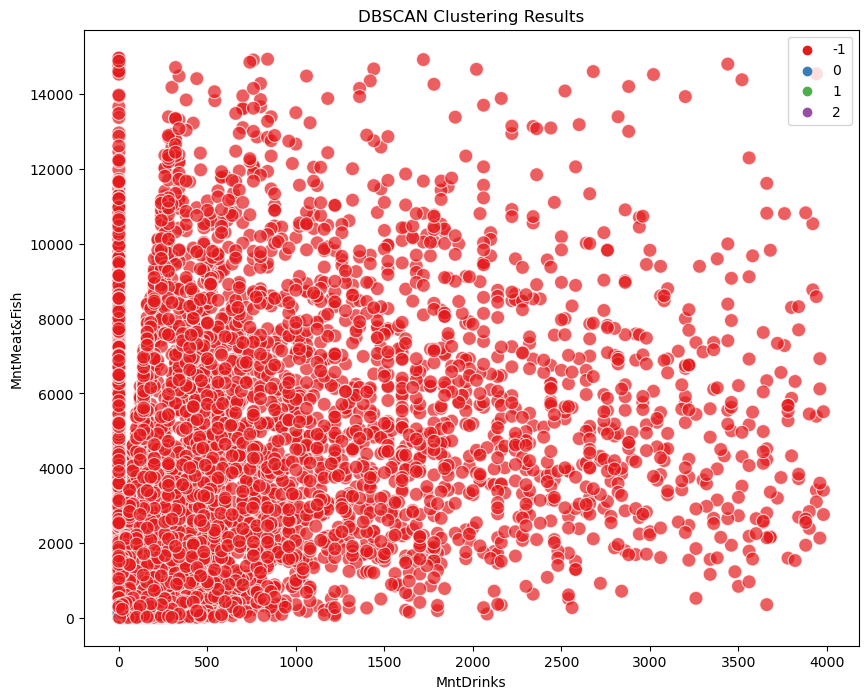

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit DBSCAN model with optimal parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df_mnt)
labels = dbscan.labels_

# Plot clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MntDrinks', y='MntMeat&Fish', hue=labels, data=df_mnt, palette='Set1', s=100, alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('MntDrinks')
plt.ylabel('MntMeat&Fish')
plt.show()

In [70]:
#let's transform

df_mnt

,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests
CustomerID,,,,,,
11054,7230.0,1820,3435.0,1600.0,440.0,57.0
17117,5850.0,320,2745.0,500.0,320.0,8.0
31751,8380.0,0,1560.0,0.0,0.0,28.0
12947,5090.0,280,2355.0,140.0,560.0,78.0
11402,330.0,0,240.0,0.0,0.0,7.0
...,...,...,...,...,...,...
23699,290.0,20,180.0,0.0,40.0,4.0
23255,230.0,80,525.0,20.0,80.0,23.0
5798,3050.0,2460,3840.0,1800.0,980.0,107.0


In [71]:
df_mnt2=df_mnt.copy()

In [72]:
df_mnt2['extras'] = df_mnt2['MntEntries'] + df_mnt2['MntDesserts']


In [73]:
df_mnt2 = df_mnt2.drop(['MntEntries', 'MntDesserts'], axis=1)


In [74]:
df_mnt2

,MntMeat&Fish,MntVegan&Vegetarian,MntDrinks,MntAdditionalRequests,extras
CustomerID,,,,,
11054,7230.0,3435.0,1600.0,57.0,2260.0
17117,5850.0,2745.0,500.0,8.0,640.0
31751,8380.0,1560.0,0.0,28.0,0.0
12947,5090.0,2355.0,140.0,78.0,840.0
11402,330.0,240.0,0.0,7.0,0.0
...,...,...,...,...,...
23699,290.0,180.0,0.0,4.0,60.0
23255,230.0,525.0,20.0,23.0,160.0
5798,3050.0,3840.0,1800.0,107.0,3440.0


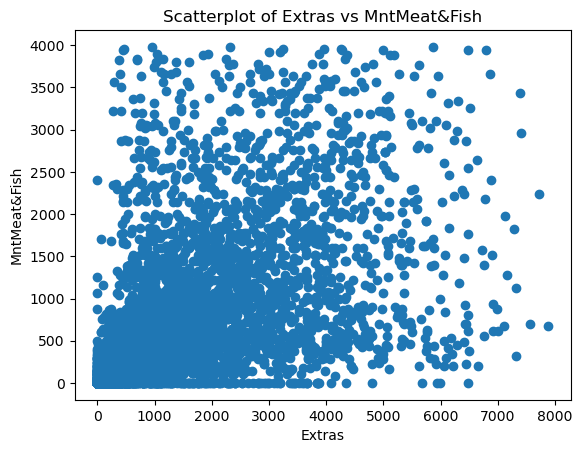

In [76]:
import matplotlib.pyplot as plt

# Extract the columns of interest
extras = df_mnt2['extras']
meat_fish = df_mnt2['MntDrinks']

# Create the scatterplot
plt.scatter(extras, meat_fish)

# Set the axis labels and title
plt.xlabel('Extras')
plt.ylabel('MntMeat&Fish')
plt.title('Scatterplot of Extras vs MntMeat&Fish')

# Show the plot
plt.show()

In [77]:
df_mnt2['mains'] = df_mnt2['MntMeat&Fish'] + df_mnt2['MntVegan&Vegetarian']

In [78]:
df_mnt2 = df_mnt2.drop(['MntMeat&Fish', 'MntVegan&Vegetarian'], axis=1)

In [79]:
df_mnt2

,MntDrinks,MntAdditionalRequests,extras,mains
CustomerID,,,,
11054,1600.0,57.0,2260.0,10665.0
17117,500.0,8.0,640.0,8595.0
31751,0.0,28.0,0.0,9940.0
12947,140.0,78.0,840.0,7445.0
11402,0.0,7.0,0.0,570.0
...,...,...,...,...
23699,0.0,4.0,60.0,470.0
23255,20.0,23.0,160.0,755.0
5798,1800.0,107.0,3440.0,6890.0


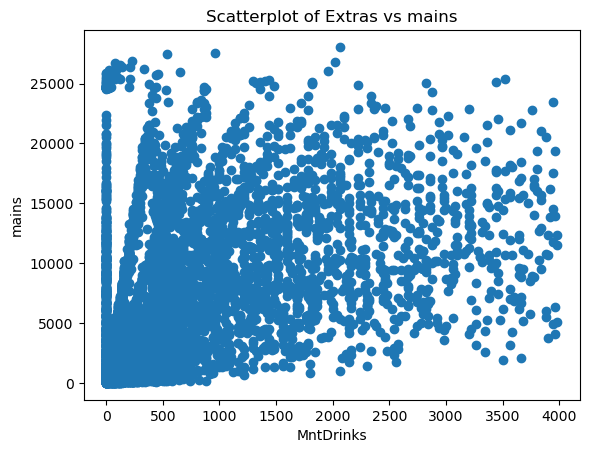

In [83]:
# Extract the columns of interest
extras = df_mnt2['MntDrinks']
meat_fish = df_mnt2['mains']

# Create the scatterplot
plt.scatter(extras, meat_fish)

# Set the axis labels and title
plt.xlabel('MntDrinks')
plt.ylabel('mains')
plt.title('Scatterplot of Extras vs mains')

# Show the plot
plt.show()

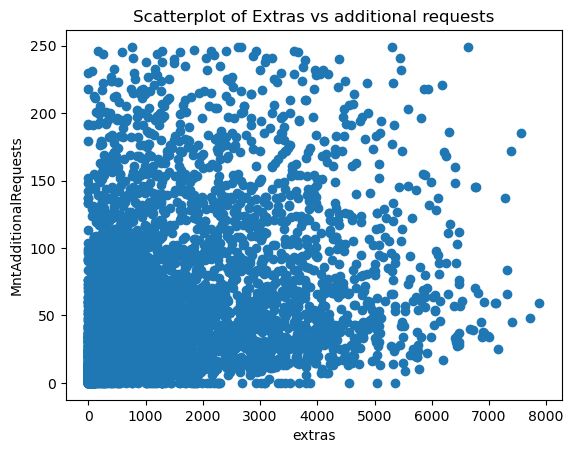

In [86]:
# Extract the columns of interest
extras = df_mnt2['extras']
meat_fish = df_mnt2['MntAdditionalRequests']

# Create the scatterplot
plt.scatter(extras, meat_fish)

# Set the axis labels and title
plt.xlabel('extras')
plt.ylabel('MntAdditionalRequests')
plt.title('Scatterplot of Extras vs additional requests')

# Show the plot
plt.show()

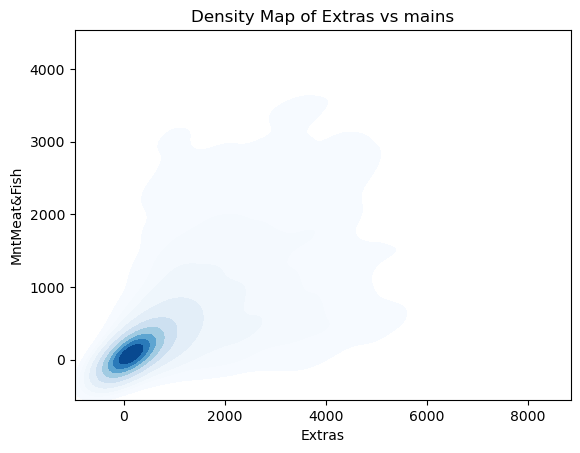

In [93]:
import seaborn as sns

# Extract the columns of interest
extras = df_mnt2['extras']
meat_fish = df_mnt2['MntDrinks']

# Create the density map
sns.kdeplot(x=extras, y=meat_fish, cmap='Blues', shade=True)

# Set the axis labels and title
plt.xlabel('Extras')
plt.ylabel('MntMeat&Fish')
plt.title('Density Map of Extras vs mains')

# Show the plot
plt.show()


In [286]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Extract the columns of interest
X = df_mnt2

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Instantiate and fit the DBSCAN model
dbscan = DBSCAN(eps=0.74, min_samples=31, metric='euclidean')
dbscan.fit(X)

# Add the cluster labels to the dataframe
df_mnt2['cluster'] = dbscan.labels_

# Print the number of clusters and cluster labels
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print('Number of clusters:', n_clusters)
print('Cluster labels:', dbscan.labels_)


Number of clusters: 4
Cluster labels: [ 0  0  0 ... -1  0  0]


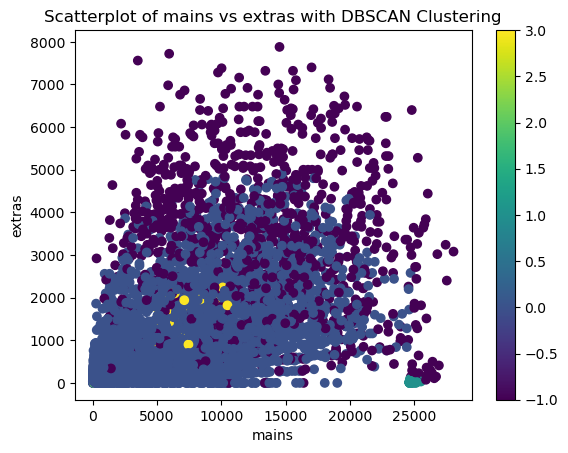

In [287]:
import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'mains'
y_var = 'extras'

# Create the scatterplot
plt.scatter(df_mnt2[x_var], df_mnt2[y_var], c=df_mnt2['cluster'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()


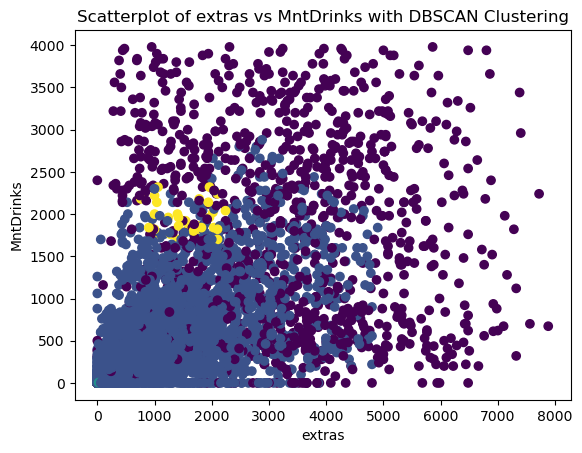

In [288]:
import matplotlib.pyplot as plt

# Set the columns of interest and the cluster label column
x_var = 'extras'
y_var = 'MntDrinks'
cluster_var = 'cluster'

# Create the scatterplot with cluster labels as colors
plt.scatter(df_mnt2[x_var], df_mnt2[y_var], c=df_mnt2[cluster_var], cmap='viridis')

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()


In [289]:
# Count the number of points in each cluster
cluster_counts = df_mnt2['cluster'].value_counts()

# Print the number of points in cluster -1
n_noise = cluster_counts[-1]
print('Number of noise points:', n_noise)

Number of noise points: 1040


In [290]:
# Count the number of points in each cluster
cluster_counts = df_mnt2['cluster'].value_counts()

# Print the number of points in each cluster
for cluster_id, n_points in cluster_counts.iteritems():
    print(f"Cluster {cluster_id}: {n_points} points")


Cluster 0: 5843 points
Cluster -1: 1040 points
Cluster 1: 44 points
Cluster 2: 40 points
Cluster 3: 33 points


In [291]:
# Compute summary statistics for each cluster
cluster_stats = df_mnt2.groupby('cluster').agg(['mean', 'median', 'std', 'count'])

cluster_stats

MntDrinks                            MntAdditionalRequests         \
                mean  median          std count                  mean median   
cluster                                                                        
-1       1789.461538  1770.0  1124.163557  1040            105.410192  98.50   
 0        325.239500   120.0   463.352726  5843             32.040955  19.00   
 1          7.954545     2.0    11.235232    44              1.865909   1.35   
 2          0.000000     0.0     0.000000    40              1.007500   1.15   
 3       1942.424242  1860.0   185.051180    33             28.151515  29.00   

                               extras                             \
               std count         mean  median          std count   
cluster                                                            
-1       65.862151  1040  3260.026923  3280.0  1682.768689  1040   
 0       36.627068  5843   699.021770   280.0   926.416614  5843   
 1        1.956378    44    20.727273    12.0    25.313259    44   
 2        1.006234    40     0.100000     0.0     0.632456    40   
 3       13.645332    33  1579.090909  1600.0   451.946648    33   

                mains                              
                 mean   median          std count  
cluster                                            
-1       12683.928846  12327.5  6121.077450  1040  
 0        4539.201061   2210.0  5221.031205  5843  
 1       24808.404545  24690.5   237.118631    44  
 2         169.762500    177.5    36.903545    40  
 3        7267.393939   7150.0  1944.401755    33

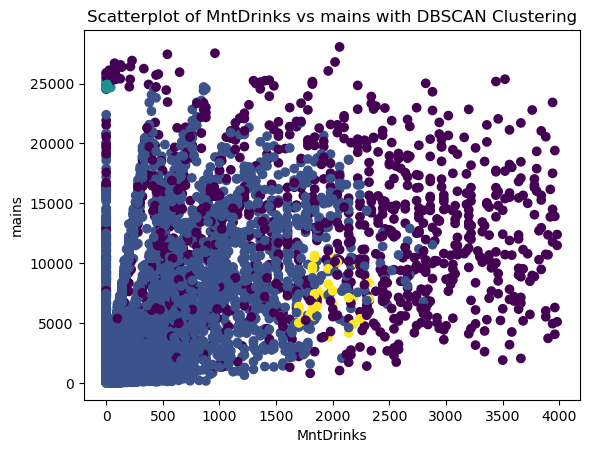

In [294]:
import matplotlib.pyplot as plt

# Set the columns of interest and the cluster label column
x_var = 'MntDrinks'
y_var = 'mains'
cluster_var = 'cluster'

# Create the scatterplot with cluster labels as colors
plt.scatter(df_mnt2[x_var], df_mnt2[y_var], c=df_mnt2[cluster_var], cmap='viridis')

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()

In [295]:
#DO IT
df_mnt2.groupby(['cluster']).describe().transpose()

cluster                                -1             0             1  \
MntDrinks             count   1040.000000   5843.000000     44.000000   
                      mean    1789.461538    325.239500      7.954545   
                      std     1124.163557    463.352726     11.235232   
                      min        0.000000      0.000000      0.000000   
                      25%      760.000000     20.000000      0.000000   
                      50%     1770.000000    120.000000      2.000000   
                      75%     2740.000000    440.000000     12.500000   
                      max     3980.000000   2880.000000     46.000000   
MntAdditionalRequests count   1040.000000   5843.000000     44.000000   
                      mean     105.410192     32.040955      1.865909   
                      std       65.862151     36.627068      1.956378   
                      min        0.000000      0.000000      0.000000   
                      25%       48.000000      7.000000      0.475000   
                      50%       98.500000     19.000000      1.350000   
                      75%      153.000000     43.000000      2.550000   
                      max      249.000000    229.000000      9.400000   
extras                count   1040.000000   5843.000000     44.000000   
                      mean    3260.026923    699.021770     20.727273   
                      std     1682.768689    926.416614     25.313259   
                      min        0.000000      0.000000      0.000000   
                      25%     1940.000000     80.000000      4.000000   
                      50%     3280.000000    280.000000     12.000000   
                      75%     4372.500000    980.000000     22.000000   
                      max     7880.000000   4900.000000     92.000000   
mains                 count   1040.000000   5843.000000     44.000000   
                      mean   12683.928846   4539.201061  24808.404545   
                      std     6121.077450   5221.031205    237.118631   
                      min      290.000000      0.000000  24624.000000   
                      25%     7828.750000    430.000000  24653.250000   
                      50%    12327.500000   2210.000000  24690.500000   
                      75%    16848.750000   7475.000000  24888.500000   
                      max    28065.000000  24720.000000  25523.500000   

cluster                               2             3  
MntDrinks             count   40.000000     33.000000  
                      mean     0.000000   1942.424242  
                      std      0.000000    185.051180  
                      min      0.000000   1700.000000  
                      25%      0.000000   1820.000000  
                      50%      0.000000   1860.000000  
                      75%      0.000000   2040.000000  
                      max      0.000000   2320.000000  
MntAdditionalRequests count   40.000000     33.000000  
                      mean     1.007500     28.151515  
                      std      1.006234     13.645332  
                      min      0.000000      6.000000  
                      25%      0.000000     17.000000  
                      50%      1.150000     29.000000  
                      75%      2.000000     38.000000  
                      max      2.000000     57.000000  
extras                count   40.000000     33.000000  
                      mean     0.100000   1579.090909  
                      std      0.632456    451.946648  
                      min      0.000000    760.000000  
                      25%      0.000000   1240.000000  
                      50%      0.000000   1600.000000  
                      75%      0.000000   1960.000000  
                      max      4.000000   2480.000000  
mains                 count   40.000000     33.000000  
                      mean   169.762500   7267.393939  
                      std     36.903545   1944.401755  
                      

In [502]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Extract the columns of interest
X = df_mnt

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Instantiate and fit the DBSCAN model
dbscan = DBSCAN(eps=0.68, min_samples=21, metric='euclidean')
dbscan.fit(X)

# Add the cluster labels to the dataframe
df_mnt['cluster_'] = dbscan.labels_

# Print the number of clusters and cluster labels
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print('Number of clusters:', n_clusters)
print('Cluster labels:', dbscan.labels_)

Number of clusters: 3
Cluster labels: [-1  0  0 ... -1  1  1]


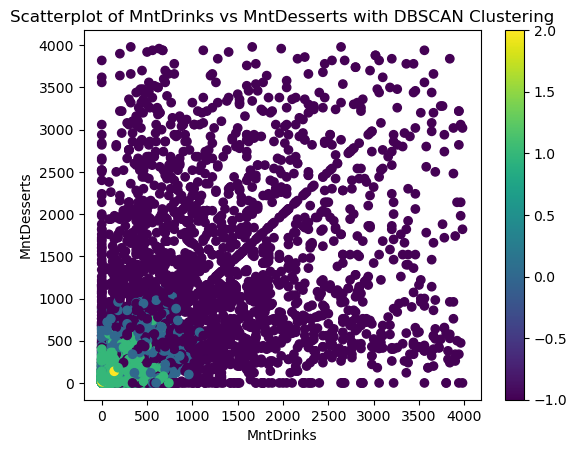

In [503]:
import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'MntDrinks'
y_var = 'MntDesserts'

# Create the scatterplot
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=df_mnt['cluster_'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()

In [505]:
# Compute summary statistics for each cluster
ogcluster = df_mnt.groupby('cluster_').agg(['mean', 'median', 'std', 'count'])

ogcluster

MntMeat&Fish                              MntEntries         \
                 mean  median          std count         mean median   
cluster_                                                               
-1        5701.434979  5210.0  3356.057669  2653  1200.482473  940.0   
 0        4594.139092  4120.0  2832.149771   683   330.746706  300.0   
 1         909.553263   290.0  1384.727070  3601    91.611775   60.0   
 2         280.338095   131.0   337.889409    63    40.825397    8.0   

                           MntVegan&Vegetarian           ...   MntDrinks  \
                 std count                mean   median  ...         std   
cluster_                                                 ...               
-1        936.012704  2653         5645.405579   4860.0  ...  957.136640   
 0        257.376498   683         1992.390922   1845.0  ...  259.482489   
 1        116.229865  3601          442.332963    255.0  ...  115.916905   
 2         67.001815    63        24832.547619  24685.5  ...   80.594107   

                MntDesserts                          MntAdditionalRequests  \
         count         mean median         std count                  mean   
cluster_                                                                     
-1        2653  1211.177535  960.0  961.186531  2653             76.277422   
 0         683   346.986823  340.0  265.035965   683             54.812592   
 1        3601    92.014496   60.0  114.631979  3601             16.055151   
 2          63    47.650794   12.0   81.520573    63              4.407937   

                                  
         median        std count  
cluster_                          
-1         57.0  59.310161  2653  
 0         41.0  41.534002   683  
 1         10.2  16.718645  3601  
 2          2.3   5.915625    63  

[4 rows x 24 columns]

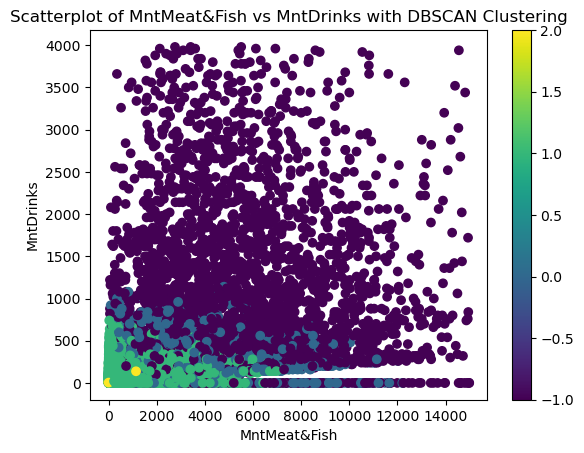

In [506]:
import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'MntMeat&Fish'
y_var = 'MntDrinks'

# Create the scatterplot
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=df_mnt['cluster_'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()